In [5]:
library(dplyr)
library(tidyverse)
library(magrittr)
library(RColorBrewer)
library(ggrepel)

In [8]:
in_vec <- function(refvec, vecx){
  out_vec <- numeric(length(vecx))
  for (x in c(1:length(vecx))){
    if (vecx[x] %in% refvec){
      out_vec[x] <- 1
    }
    else {
      out_vec[x] <- 0
    }
  }
  return(out_vec)
}

in_vec_name <- function(refvec, vecx){
  out_vec <- character(length(vecx))
  for (x in c(1:length(vecx))){
    if (vecx[x] %in% refvec){
      out_vec[x] <- vecx[x]
    }
    else {
      out_vec[x] <- ""
    }
  }
  return(out_vec)
}

In [6]:
wk.dir <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/7_CRF_Screen'
setwd(wk.dir)

z.p.file <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/7_CRF_Screen/5_zscore_div_sqrt_pval/all_z-score_div_sqrt-p_sqrt.csv'
z.p.tb <- read_csv(z.p.file)


── Column specification ──────────────────────────────────────────────────────────────────
cols(
  gene_name = col_character(),
  Q4minusQ1 = col_double(),
  Q3minusOther = col_double(),
  InputMinusAvg = col_double()
)




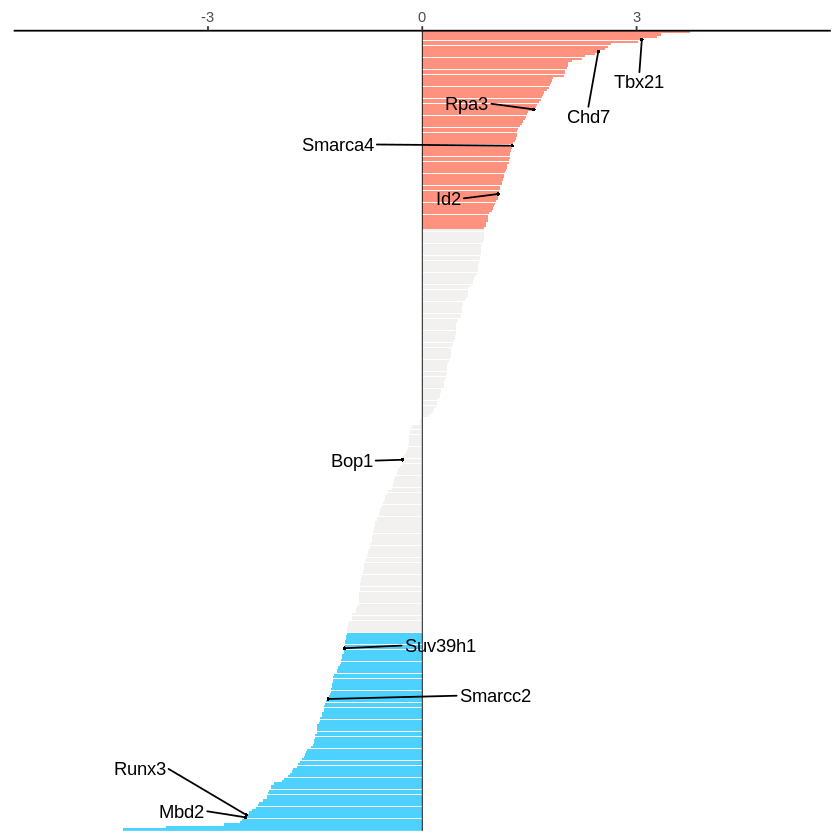

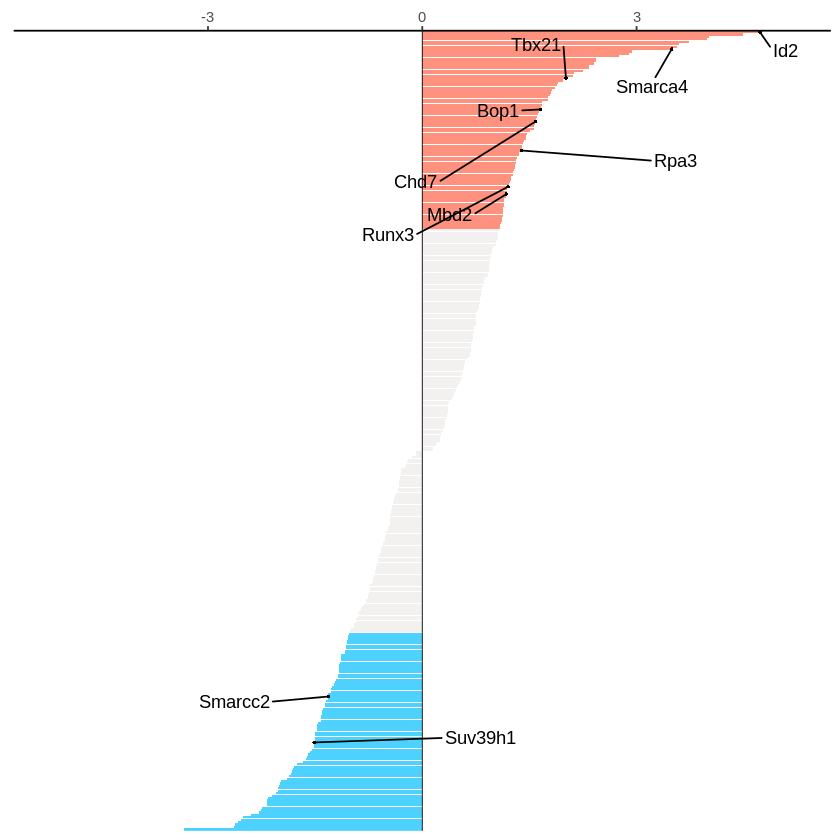

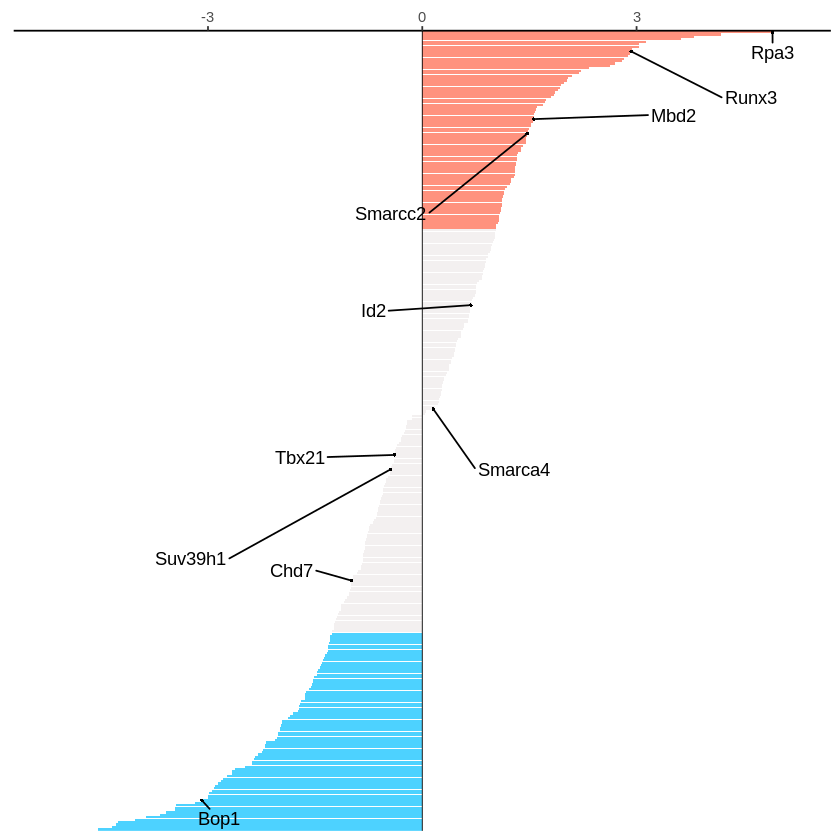

In [12]:
anno.vec <- c("Tbx21", "Id2", "Runx3", "Mbd2", "Suv39h1", "Rpa3", "Bop1", "Chd7", "Smarca4", "Smarcc2")
name.root <- "Baf"

#####---------- Q4 minus Q1
out.name <- paste(name.root, "Q4minusQ1.bar.pdf", sep="_")

# Rank order
z.p.tb <- z.p.tb %>% arrange(Q4minusQ1)
z.p.tb <- within(z.p.tb, z.p.tb$gene_name <- factor(z.p.tb$gene_name, levels=z.p.tb$gene_name))

# Set color for top and bottom quarter
col_panel <- c( "deepskyblue", "snow2", "tomato")
qt <- as.integer(floor(nrow(z.p.tb)/4))
col.vec <- rep(col_panel[1], qt)
col.vec <- c(col.vec, rep(col_panel[2], nrow(z.p.tb)-2*qt))
col.vec <- c(col.vec, rep(col_panel[3], qt))
z.p.tb$color_use <- col.vec


# Select annotations
z.p.tb <- z.p.tb %>% 
mutate(pointsize = in_vec(anno.vec, gene_name)) %>%
mutate(annoname = in_vec_name(anno.vec, gene_name))

# Plot
bar.plot <- ggplot(z.p.tb, aes(z.p.tb$gene_name, z.p.tb$Q4minusQ1, fill=col.vec)) +
geom_col(alpha=0.7) +
geom_point(size=z.p.tb$pointsize, stroke = 0) +
scale_fill_manual(values=col_panel) +
geom_text_repel(aes(label=annoname), force=25, min.segment.length=0, max.overlaps = Inf) +
coord_flip() +
scale_y_continuous(position = "right", limits=c(-5.2, 5.2)) +
geom_hline(yintercept=0, size=0.25) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "white",colour = "white", size = 0.5, linetype = "solid"),
      axis.line.x = element_line(colour="black", size=0.5), axis.title.x = element_blank(), 
      axis.ticks.y = element_blank(), axis.text.y=element_blank(), axis.title.y = element_blank(),
      legend.position = "none")
bar.plot

ggsave(out.name, width=6, height=9, units="cm")

#####---------- Q3 minus other
out.name <- paste(name.root, "Q3minusOther.bar.pdf", sep="_")

# Rank order
z.p.tb <- z.p.tb %>% arrange(Q3minusOther)
z.p.tb <- within(z.p.tb, z.p.tb$gene_name <- factor(z.p.tb$gene_name, levels=z.p.tb$gene_name))

# Set color for top and bottom quarter
col_panel <- c("deepskyblue", "snow2", "tomato")
qt <- as.integer(floor(nrow(z.p.tb)/4))
col.vec <- rep(col_panel[1], qt)
col.vec <- c(col.vec, rep(col_panel[2], nrow(z.p.tb)-2*qt))
col.vec <- c(col.vec, rep(col_panel[3], qt))
z.p.tb$color_use <- col.vec

# Select annotations
z.p.tb <- z.p.tb %>% 
mutate(pointsize = in_vec(anno.vec, gene_name)) %>%
mutate(annoname = in_vec_name(anno.vec, gene_name))

# Plot
bar.plot <- ggplot(z.p.tb, aes(z.p.tb$gene_name, z.p.tb$Q3minusOther, fill=col.vec)) +
geom_col(alpha=0.7) +
geom_point(size=z.p.tb$pointsize, stroke = 0) +
scale_fill_manual(values=col_panel) +
geom_text_repel(aes(label=annoname), force=25, min.segment.length=0, max.overlaps = Inf) +
coord_flip() +
scale_y_continuous(position = "right", limits=c(-5.2, 5.2)) +
geom_hline(yintercept=0, size=0.25) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "white",colour = "white", size = 0.5, linetype = "solid"),
      axis.line.x = element_line(colour="black", size=0.5), axis.title.x = element_blank(), 
      axis.ticks.y = element_blank(), axis.text.y=element_blank(), axis.title.y = element_blank(),
      legend.position = "none")
bar.plot

ggsave(out.name, width=6, height=9, units="cm")

#####---------- Input v.s. output
out.name <- paste(name.root, "InputMinusAvg.bar.pdf", sep="_")

# Rank order
z.p.tb <- z.p.tb %>% arrange(z.p.tb$InputMinusAvg)
z.p.tb <- within(z.p.tb, z.p.tb$gene_name <- factor(z.p.tb$gene_name, levels=z.p.tb$gene_name))

# Set color for top and bottom quarter
col_panel <- c("deepskyblue", "snow2", "tomato")
qt <- as.integer(floor(nrow(z.p.tb)/4))
col.vec <- rep(col_panel[1], qt)
col.vec <- c(col.vec, rep(col_panel[2], nrow(z.p.tb)-2*qt))
col.vec <- c(col.vec, rep(col_panel[3], qt))
z.p.tb$color_use <- col.vec

# Select annotations
z.p.tb <- z.p.tb %>% 
mutate(pointsize = in_vec(anno.vec, gene_name)) %>%
mutate(annoname = in_vec_name(anno.vec, gene_name))

# Plot
bar.plot <- ggplot(z.p.tb, aes(z.p.tb$gene_name, z.p.tb$InputMinusAvg, fill=col.vec)) +
geom_col(alpha=0.7) +
geom_point(size=z.p.tb$pointsize, stroke = 0) +
scale_fill_manual(values=col_panel) +
geom_text_repel(aes(label=annoname), force=25, min.segment.length=0, max.overlaps = Inf) +
coord_flip() +
scale_y_continuous(position = "right", limits=c(-5.2, 5.2)) +
geom_hline(yintercept=0, size=0.25) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "white",colour = "white", size = 0.5, linetype = "solid"),
      axis.line.x = element_line(colour="black", size=0.5), axis.title.x = element_blank(), 
      axis.ticks.y = element_blank(), axis.text.y=element_blank(), axis.title.y = element_blank(),
      legend.position = "none")
bar.plot

ggsave(out.name, width=6, height=9, units="cm")